#📌 Extracão

In [76]:
import pandas as pd
import json
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
with open('/content/TelecomX_Data.json','r') as f:
    dados = json.loads(f.read())

In [78]:
df = pd.json_normalize(dados, meta=['customer', 'phone', 'internet', 'account'], sep = '_')

In [79]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [81]:
df.columns = [col.split('_')[-1] for col in df.columns]

In [82]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [84]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [85]:
df.describe()

,SeniorCitizen,tenure,Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [86]:
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


#🔧 Transformação

## Padronizando os nomes das colunas


In [87]:
df.columns.tolist()

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Monthly',
 'Total']

In [88]:
def nome_padrao_colunas(nome):
    nome = re.sub(r'(.)([A-Z][a-z]+)', r'\1_\2', nome)
    nome = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', nome)
    return nome.lower()

df.columns = [nome_padrao_colunas(col.strip().replace(" ", "")) for col in df.columns]

In [89]:
df.columns.tolist()

['customer_id',
 'churn',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly',
 'total']

#### Dicionário de dados

* `customer_id`: número de identificação único de cada cliente
* `churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `senior_citizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `partner`:  se o cliente possui ou não um parceiro ou parceira
* `dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `phoneService`: assinatura de serviço telefônico
* `multipleLines`: assisnatura de mais de uma linha de telefone
* `internet_service`: assinatura de um provedor internet
* `online_security`: assinatura adicional de segurança online
* `online_backup`: assinatura adicional de backup online
* `device_protection`: assinatura adicional de proteção no dispositivo
* `tech_support`: assinatura adicional de suporte técnico, menos tempo de espera
* `streaming_tv`: assinatura de TV a cabo
* `streaming_movies`: assinatura de streaming de filmes
* `contract`: tipo de contrato
* `paperless_billing`: se o cliente prefere receber online a fatura
* `payment_method`: forma de pagamento
* `monthly`: total de todos os serviços do cliente por mês
* `total`: total gasto pelo cliente


##Verificando Inconsistências nos Dados

In [90]:
df.head(10)

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly,total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [91]:
df.dtypes

,0
customer_id,object
churn,object
gender,object
senior_citizen,int64
partner,object
dependents,object
tenure,int64
phone_service,object
multiple_lines,object
internet_service,object


In [92]:
cols = [
    'churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
    'phone_service', 'multiple_lines', 'internet_service', 'online_security',
    'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
    'streaming_movies', 'contract', 'paperless_billing', 'payment_method'
]

for col in cols:
    print(f"\n{col}:\n{df[col].value_counts(dropna=False)}")


churn:
churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

gender:
gender
Male      3675
Female    3592
Name: count, dtype: int64

senior_citizen:
senior_citizen
0    6085
1    1182
Name: count, dtype: int64

partner:
partner
No     3749
Yes    3518
Name: count, dtype: int64

dependents:
dependents
No     5086
Yes    2181
Name: count, dtype: int64

tenure:
tenure
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64

phone_service:
phone_service
Yes    6560
No      707
Name: count, dtype: int64

multiple_lines:
multiple_lines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

internet_service:
internet_service
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

online_security:
online_security
No                     3608
Yes                    2078
No internet service    1581
Name: count, dt

In [93]:
print("Linhas com churn vazio (''):", (df['churn'] == '').sum())

Linhas com churn vazio (''): 224


### Verificando linhas duplicadas baseado na coluna cutomer_id

In [94]:
df['customer_id'].duplicated().sum()

np.int64(0)

### Verificando compos vazios nas colunas

In [95]:
colunas_vazias =  df.apply(lambda col: col.astype(str).str.strip().eq('').sum())

In [96]:
colunas_vazias

,0
customer_id,0
churn,224
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


### Verificando valores mensais zero e negativos

In [97]:
df[df['monthly'] < 1]

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly,total


In [98]:
df.query('tenure == 0')

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly,total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


## Arrumando a coluna Total

In [99]:
(df['total'].isna() | df['total'].str.strip().eq('')).sum()

np.int64(11)

In [100]:
df['total'] = df['total'].replace(' ', 0).replace('', 0)
df['total'] = df['total'].astype(np.float64)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   object 
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   object 
 5   dependents         7267 non-null   object 
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   object 
 8   multiple_lines     7267 non-null   object 
 9   internet_service   7267 non-null   object 
 10  online_security    7267 non-null   object 
 11  online_backup      7267 non-null   object 
 12  device_protection  7267 non-null   object 
 13  tech_support       7267 non-null   object 
 14  streaming_tv       7267 non-null   object 
 15  streaming_movies   7267 non-null   object 
 16  contract           7267 

## Tratando a coluna churn


In [102]:
df['churn'] = df['churn'].replace(['', ' '], np.nan)

In [103]:
df.isnull().sum()

,0
customer_id,0
churn,224
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


In [104]:
df_com_churn_vazio = df[df.isna().any(axis=1)]

In [105]:
df = df.dropna()

In [106]:
df.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


## Transformando colunas yes ou no em binario

In [107]:
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly,total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [108]:
colunas_internet_service = [
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies'
]
df[colunas_internet_service] = df[colunas_internet_service].replace('No internet service', 'No')

In [109]:
for col in colunas_internet_service:
    print(f"\n{col}:\n{df[col].value_counts(dropna=False)}")


online_security:
online_security
No     5024
Yes    2019
Name: count, dtype: int64

online_backup:
online_backup
No     4614
Yes    2429
Name: count, dtype: int64

device_protection:
device_protection
No     4621
Yes    2422
Name: count, dtype: int64

tech_support:
tech_support
No     4999
Yes    2044
Name: count, dtype: int64

streaming_tv:
streaming_tv
No     4336
Yes    2707
Name: count, dtype: int64

streaming_movies:
streaming_movies
No     4311
Yes    2732
Name: count, dtype: int64


In [110]:
df['multiple_lines'] = df['multiple_lines'].replace('No phone service', 'No')

In [111]:
print(df['multiple_lines'].unique())

['No' 'Yes']


In [112]:
Colunas_para_binario = [
    'churn',
    'partner',
    'dependents',
    'phone_service',
    'multiple_lines',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'paperless_billing'
]
df[Colunas_para_binario] = df[Colunas_para_binario].replace({'Yes': 1, 'No': 0}).astype(np.int64)

<ipython-input-112-3998998108>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[Colunas_para_binario] = df[Colunas_para_binario].replace({'Yes': 1, 'No': 0}).astype(np.int64)


In [113]:
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly,total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [114]:
cols = [
    'churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
    'phone_service', 'multiple_lines', 'internet_service', 'online_security',
    'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
    'streaming_movies', 'contract', 'paperless_billing', 'payment_method'
]

for col in cols:
    print(f"\n{col}:\n{df[col].value_counts(dropna=False)}")


churn:
churn
0    5174
1    1869
Name: count, dtype: int64

gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

senior_citizen:
senior_citizen
0    5901
1    1142
Name: count, dtype: int64

partner:
partner
0    3641
1    3402
Name: count, dtype: int64

dependents:
dependents
0    4933
1    2110
Name: count, dtype: int64

tenure:
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

phone_service:
phone_service
1    6361
0     682
Name: count, dtype: int64

multiple_lines:
multiple_lines
0    4072
1    2971
Name: count, dtype: int64

internet_service:
internet_service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

online_security:
online_security
0    5024
1    2019
Name: count, dtype: int64

online_backup:
online_backup
0    4614
1    2429
Name: count, dtype: int64

device_protection:
device_protection
0    4621
1    2422
Na

## Criando a coluna Contas Diárias e a coluna Total Previsto

In [115]:
df['contas_diarias'] = df['monthly'] / 30

In [116]:
df['total_previsto'] = df['monthly'] * df['tenure']

In [117]:
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly,total,contas_diarias,total_previsto
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667,590.4
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,539.1
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,295.6
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,1274.0
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,251.7


## Renomeando as colunas para pt-br

In [118]:
df.rename(columns={
    'customer_id': 'cliente_id',
    'churn': 'cancelamento',
    'gender': 'genero',
    'senior_citizen': 'idoso',
    'partner': 'tem_parceiro',
    'dependents': 'tem_dependentes',
    'tenure': 'permanencia',
    'phone_service': 'servico_telefonico',
    'multiple_lines': 'multiplas_linhas',
    'internet_service': 'tipo_internet',
    'online_security': 'seguranca_online',
    'online_backup': 'backup_online',
    'device_protection': 'protecao_dispositivo',
    'tech_support': 'suporte_tecnico',
    'streaming_tv': 'tv_streaming',
    'streaming_movies': 'filmes_streaming',
    'contract': 'tipo_contrato',
    'paperless_billing': 'fatura_digital',
    'payment_method': 'forma_pagamento',
    'monthly': 'valor_mensal'

}, inplace=True)

In [119]:
df.head()

,cliente_id,cancelamento,genero,idoso,tem_parceiro,tem_dependentes,permanencia,servico_telefonico,multiplas_linhas,tipo_internet,...,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_digital,forma_pagamento,valor_mensal,total,contas_diarias,total_previsto
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667,590.4
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,539.1
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,295.6
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,1274.0
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,251.7


In [120]:
df['genero']= df['genero'].replace({'Female': 'feminino', 'Male': 'masculino'})
df['tipo_internet']= df['tipo_internet'].replace({'Fiber optic': 'fibra optica', 'DSL': 'dsl', 'No': 'nenhum'})
df['tipo_contrato'] = df['tipo_contrato'].replace({'Month-to-month': 'mensal', 'One year': 'anual (1 ano)', 'Two year': 'anual (2 anos)'})
df['forma_pagamento'] = df['forma_pagamento'].replace({
    'Electronic check': 'débito em conta',
    'Mailed check': 'boleto bancário',
    'Bank transfer (automatic)': 'transferência automática',
    'Credit card (automatic)': 'cartão de crédito automático',})

In [121]:
df.head()

,cliente_id,cancelamento,genero,idoso,tem_parceiro,tem_dependentes,permanencia,servico_telefonico,multiplas_linhas,tipo_internet,...,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_digital,forma_pagamento,valor_mensal,total,contas_diarias,total_previsto
0,0002-ORFBO,0,feminino,0,1,1,9,1,0,dsl,...,1,1,0,anual (1 ano),1,boleto bancário,65.6,593.30,2.186667,590.4
1,0003-MKNFE,0,masculino,0,0,0,9,1,1,dsl,...,0,0,1,mensal,0,boleto bancário,59.9,542.40,1.996667,539.1
2,0004-TLHLJ,1,masculino,0,0,0,4,1,0,fibra optica,...,0,0,0,mensal,1,débito em conta,73.9,280.85,2.463333,295.6
3,0011-IGKFF,1,masculino,1,1,0,13,1,0,fibra optica,...,0,1,1,mensal,1,débito em conta,98.0,1237.85,3.266667,1274.0
4,0013-EXCHZ,1,feminino,1,1,0,3,1,0,fibra optica,...,1,1,0,mensal,1,boleto bancário,83.9,267.40,2.796667,251.7


In [122]:
df.dtypes

,0
cliente_id,object
cancelamento,int64
genero,object
idoso,int64
tem_parceiro,int64
tem_dependentes,int64
permanencia,int64
servico_telefonico,int64
multiplas_linhas,int64
tipo_internet,object


## Usando One-Hot Encoding

In [123]:
df.head()

,cliente_id,cancelamento,genero,idoso,tem_parceiro,tem_dependentes,permanencia,servico_telefonico,multiplas_linhas,tipo_internet,...,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_digital,forma_pagamento,valor_mensal,total,contas_diarias,total_previsto
0,0002-ORFBO,0,feminino,0,1,1,9,1,0,dsl,...,1,1,0,anual (1 ano),1,boleto bancário,65.6,593.30,2.186667,590.4
1,0003-MKNFE,0,masculino,0,0,0,9,1,1,dsl,...,0,0,1,mensal,0,boleto bancário,59.9,542.40,1.996667,539.1
2,0004-TLHLJ,1,masculino,0,0,0,4,1,0,fibra optica,...,0,0,0,mensal,1,débito em conta,73.9,280.85,2.463333,295.6
3,0011-IGKFF,1,masculino,1,1,0,13,1,0,fibra optica,...,0,1,1,mensal,1,débito em conta,98.0,1237.85,3.266667,1274.0
4,0013-EXCHZ,1,feminino,1,1,0,3,1,0,fibra optica,...,1,1,0,mensal,1,boleto bancário,83.9,267.40,2.796667,251.7


In [124]:
colunas_categoricas = ['genero', 'tipo_internet', 'tipo_contrato', 'forma_pagamento']

for coluna in colunas_categoricas:
    pos = df.columns.get_loc(coluna)
    dummies = pd.get_dummies(df[coluna], prefix=coluna).astype(int)
    df.drop(columns=[coluna], inplace=True)
    for i, dummy_col in enumerate(dummies.columns):
        df.insert(loc=pos + i, column=dummy_col, value=dummies[dummy_col])

In [125]:
df.dtypes

,0
cliente_id,object
cancelamento,int64
genero_feminino,int64
genero_masculino,int64
idoso,int64
tem_parceiro,int64
tem_dependentes,int64
permanencia,int64
servico_telefonico,int64
multiplas_linhas,int64


In [126]:
df.rename(columns={
    'genero_feminino': 'gen_feminino',
    'genero_masculino': 'gen_masculino',
    'tipo_internet_dsl': 'internet_dsl',
    'tipo_internet_fibra optica': 'internet_fibra',
    'tipo_internet_nenhum': 'internet_nenhum',
    'tipo_contrato_anual (1 ano)': 'contrato_1_ano',
    'tipo_contrato_anual (2 anos)': 'contrato_2_anos',
    'tipo_contrato_mensal': 'contrato_mensal',
    'forma_pagamento_boleto bancário': 'pagamento_boleto_bancario',
    'forma_pagamento_cartão de crédito automático': 'pagamento_cartao_credito_automatico',
    'forma_pagamento_débito em conta': 'pagamento_debito_em_conta',
    'forma_pagamento_transferência automática': 'pagamento_transferencia_automatica'
}, inplace=True)

In [127]:
df.dtypes

,0
cliente_id,object
cancelamento,int64
gen_feminino,int64
gen_masculino,int64
idoso,int64
tem_parceiro,int64
tem_dependentes,int64
permanencia,int64
servico_telefonico,int64
multiplas_linhas,int64


In [128]:
df.head()

,cliente_id,cancelamento,gen_feminino,gen_masculino,idoso,tem_parceiro,tem_dependentes,permanencia,servico_telefonico,multiplas_linhas,...,contrato_mensal,fatura_digital,pagamento_boleto_bancario,pagamento_cartao_credito_automatico,pagamento_debito_em_conta,pagamento_transferencia_automatica,valor_mensal,total,contas_diarias,total_previsto
0,0002-ORFBO,0,1,0,0,1,1,9,1,0,...,0,1,1,0,0,0,65.6,593.30,2.186667,590.4
1,0003-MKNFE,0,0,1,0,0,0,9,1,1,...,1,0,1,0,0,0,59.9,542.40,1.996667,539.1
2,0004-TLHLJ,1,0,1,0,0,0,4,1,0,...,1,1,0,0,1,0,73.9,280.85,2.463333,295.6
3,0011-IGKFF,1,0,1,1,1,0,13,1,0,...,1,1,0,0,1,0,98.0,1237.85,3.266667,1274.0
4,0013-EXCHZ,1,1,0,1,1,0,3,1,0,...,1,1,1,0,0,0,83.9,267.40,2.796667,251.7


#📊 Carga e análise

## Analizando os dados

In [129]:
df.head()

,cliente_id,cancelamento,gen_feminino,gen_masculino,idoso,tem_parceiro,tem_dependentes,permanencia,servico_telefonico,multiplas_linhas,...,contrato_mensal,fatura_digital,pagamento_boleto_bancario,pagamento_cartao_credito_automatico,pagamento_debito_em_conta,pagamento_transferencia_automatica,valor_mensal,total,contas_diarias,total_previsto
0,0002-ORFBO,0,1,0,0,1,1,9,1,0,...,0,1,1,0,0,0,65.6,593.30,2.186667,590.4
1,0003-MKNFE,0,0,1,0,0,0,9,1,1,...,1,0,1,0,0,0,59.9,542.40,1.996667,539.1
2,0004-TLHLJ,1,0,1,0,0,0,4,1,0,...,1,1,0,0,1,0,73.9,280.85,2.463333,295.6
3,0011-IGKFF,1,0,1,1,1,0,13,1,0,...,1,1,0,0,1,0,98.0,1237.85,3.266667,1274.0
4,0013-EXCHZ,1,1,0,1,1,0,3,1,0,...,1,1,1,0,0,0,83.9,267.40,2.796667,251.7


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   cliente_id                           7043 non-null   object 
 1   cancelamento                         7043 non-null   int64  
 2   gen_feminino                         7043 non-null   int64  
 3   gen_masculino                        7043 non-null   int64  
 4   idoso                                7043 non-null   int64  
 5   tem_parceiro                         7043 non-null   int64  
 6   tem_dependentes                      7043 non-null   int64  
 7   permanencia                          7043 non-null   int64  
 8   servico_telefonico                   7043 non-null   int64  
 9   multiplas_linhas                     7043 non-null   int64  
 10  internet_dsl                         7043 non-null   int64  
 11  internet_fibra                     

In [131]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cancelamento,7043.0,0.265370,0.441561,0.000000,0.000000,0.000,1.000,1.000000
gen_feminino,7043.0,0.495244,0.500013,0.000000,0.000000,0.000,1.000,1.000000
gen_masculino,7043.0,0.504756,0.500013,0.000000,0.000000,1.000,1.000,1.000000
idoso,7043.0,0.162147,0.368612,0.000000,0.000000,0.000,0.000,1.000000
tem_parceiro,7043.0,0.483033,0.499748,0.000000,0.000000,0.000,1.000,1.000000
tem_dependentes,7043.0,0.299588,0.458110,0.000000,0.000000,0.000,1.000,1.000000
permanencia,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.000,72.000000
servico_telefonico,7043.0,0.903166,0.295752,0.000000,1.000000,1.000,1.000,1.000000
multiplas_linhas,7043.0,0.421837,0.493888,0.000000,0.000000,0.000,1.000,1.000000
internet_dsl,7043.0,0.343746,0.474991,0.000000,0.000000,0.000,1.000,1.000000


### Perfil dos clientes

Gênero dos clientes

In [132]:
df[['gen_feminino', 'gen_masculino']].sum()

,0
gen_feminino,3488
gen_masculino,3555


Clientes Idosos

In [133]:
df['idoso'].value_counts(normalize=True)*100


,proportion
idoso,
0,83.785319
1,16.214681


parceiros/dependentes

In [134]:
df[['tem_parceiro', 'tem_dependentes']].mean()*100

,0
tem_parceiro,48.303280
tem_dependentes,29.958824


Serviços contratados

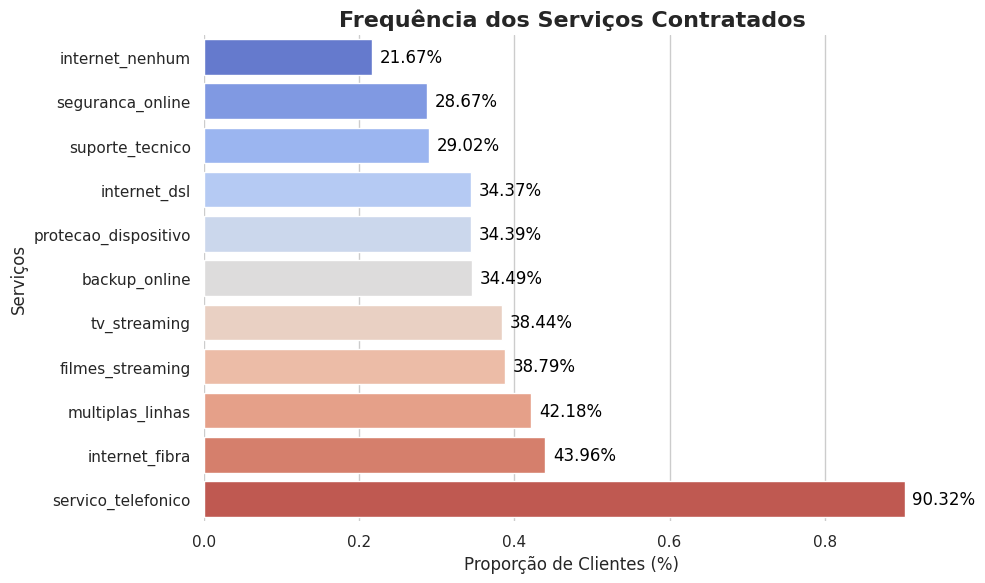

In [135]:
servicos = [
    'servico_telefonico', 'multiplas_linhas', 'internet_dsl',
    'internet_fibra', 'internet_nenhum', 'seguranca_online', 'backup_online',
    'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming', 'filmes_streaming'
]

sns.set_style("whitegrid")

frequencia_servicos = df[servicos].mean().sort_values()

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    x=frequencia_servicos.values,
    y=frequencia_servicos.index,
    hue=frequencia_servicos.index,
    palette="coolwarm",
    dodge=False,
    legend=False
)


plt.title('Frequência dos Serviços Contratados', fontsize=16, weight='bold')
plt.xlabel('Proporção de Clientes (%)', fontsize=12)
plt.ylabel('Serviços', fontsize=12)


for i, v in enumerate(frequencia_servicos.values):
    ax.text(v + 0.01, i, f'{v:.2%}', color='black', va='center')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

Faturamento

In [136]:
df[['valor_mensal', 'total', 'contas_diarias', 'total_previsto']].describe().T

,count,mean,std,min,25%,50%,75%,max
valor_mensal,7043.0,64.761692,30.090047,18.250000,35.500000,70.350,89.850,118.750000
total,7043.0,2279.734304,2266.794470,0.000000,398.550000,1394.550,3786.600,8684.800000
contas_diarias,7043.0,2.158723,1.003002,0.608333,1.183333,2.345,2.995,3.958333
total_previsto,7043.0,2279.581350,2264.729447,0.000000,394.000000,1393.600,3786.100,8550.000000


In [137]:
pagamentos = [
    'pagamento_boleto_bancario',
    'pagamento_cartao_credito_automatico',
    'pagamento_debito_em_conta',
    'pagamento_transferencia_automatica'
]

contratos = ['contrato_mensal', 'contrato_1_ano', 'contrato_2_anos']

print("Distribuição dos Tipos de Contrato:")
print(df[contratos].sum(), "\n")

print("Distribuição das Formas de Pagamento:")
print(df[pagamentos].sum())

Distribuição dos Tipos de Contrato:
contrato_mensal    3875
contrato_1_ano     1473
contrato_2_anos    1695
dtype: int64 

Distribuição das Formas de Pagamento:
pagamento_boleto_bancario              1612
pagamento_cartao_credito_automatico    1522
pagamento_debito_em_conta              2365
pagamento_transferencia_automatica     1544
dtype: int64


In [138]:
colunas_numericas = [
    'permanencia', 'valor_mensal', 'total',
    'contas_diarias', 'total_previsto'
]

for coluna in colunas_numericas:
    media = df[coluna].mean()
    mediana = df[coluna].median()
    desvio = df[coluna].std()
    print(f"\n{coluna}")
    print(f"Média: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Desvio Padrão: {desvio:.2f}")


permanencia
Média: 32.37
Mediana: 29.00
Desvio Padrão: 24.56

valor_mensal
Média: 64.76
Mediana: 70.35
Desvio Padrão: 30.09

total
Média: 2279.73
Mediana: 1394.55
Desvio Padrão: 2266.79

contas_diarias
Média: 2.16
Mediana: 2.34
Desvio Padrão: 1.00

total_previsto
Média: 2279.58
Mediana: 1393.60
Desvio Padrão: 2264.73


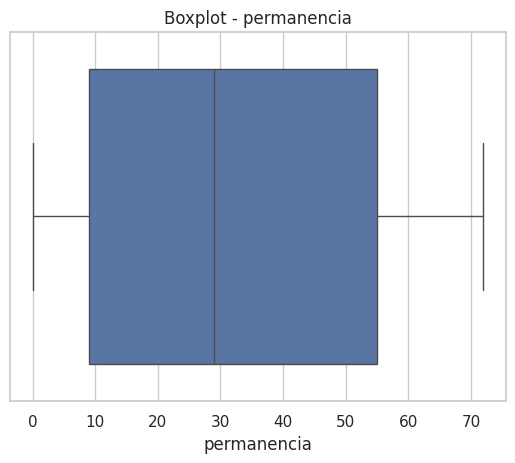

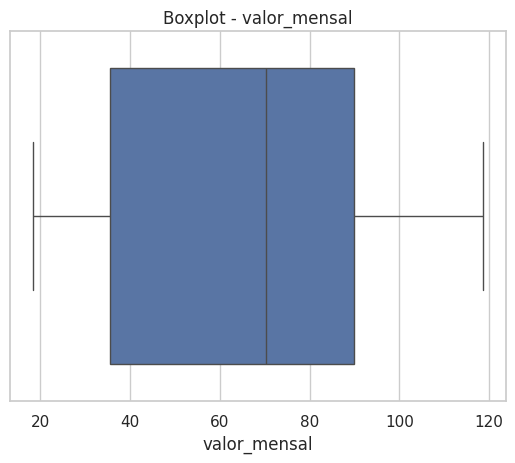

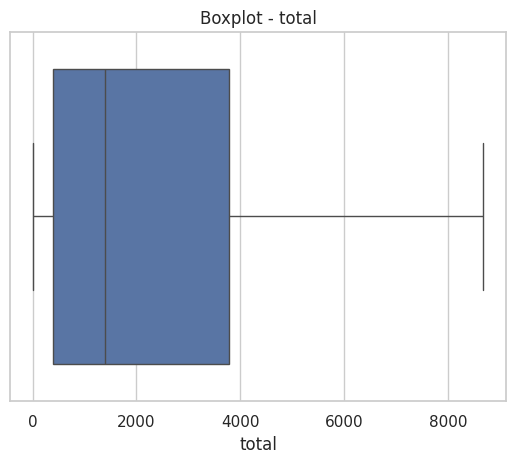

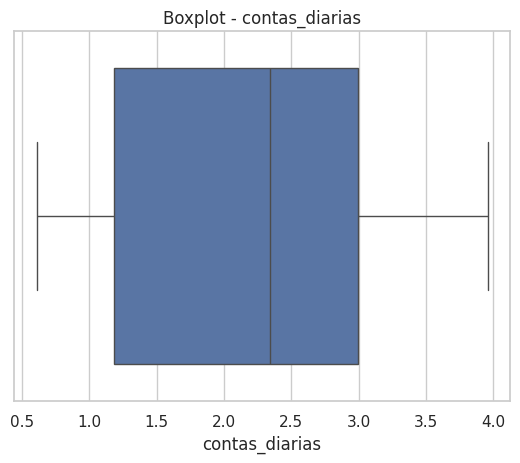

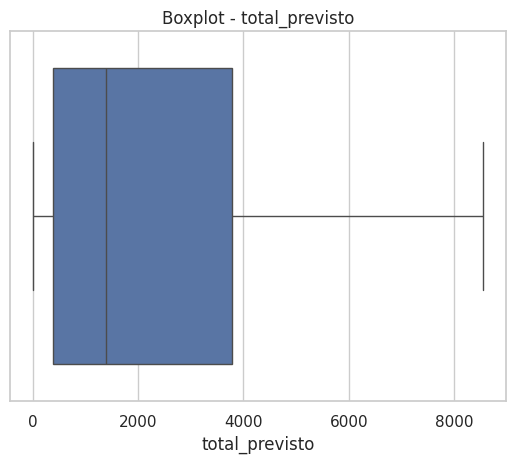

In [139]:
for col in colunas_numericas:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()

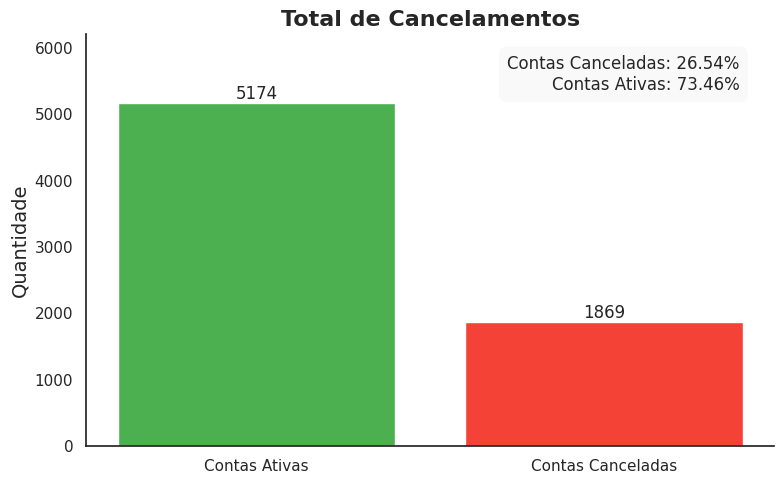

In [140]:


sns.set_style("white")

contagem = df['cancelamento'].value_counts().sort_index()
total = contagem.sum()
labels = ['Contas Ativas', 'Contas Canceladas']
colors = ['#4CAF50', '#F44336']

percentuais = (contagem / total * 100).round(2)

plt.figure(figsize=(8,5))
bars = plt.bar(labels, contagem, color=colors)

for bar, perc in zip(bars, percentuais):
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 5, f'{int(altura)}',
             ha='center', va='bottom', fontsize=12)

plt.title('Total de Cancelamentos', fontsize=16, weight='bold')
plt.ylabel('Quantidade', fontsize=14)
plt.ylim(0, contagem.max()*1.2)


texto = (f"Contas Canceladas: {percentuais[1]}%\n"
         f"Contas Ativas: {percentuais[0]}%")

plt.gca().text(0.95, 0.95, texto, fontsize=12, ha='right', va='top',
               transform=plt.gca().transAxes,
               bbox=dict(boxstyle="round,pad=0.5", facecolor="#f9f9f9", edgecolor="none", alpha=0.9))

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### Distribuição da Evasão

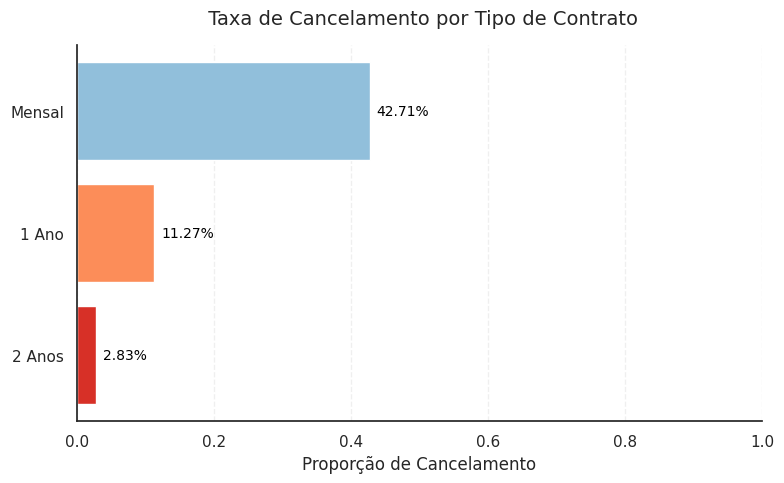

In [141]:
import matplotlib.pyplot as plt

# Dados
contratos = ['contrato_mensal', 'contrato_1_ano', 'contrato_2_anos']
cancelamento_por_contrato = {
    contrato: df[df[contrato] == 1]['cancelamento'].mean()
    for contrato in contratos
}


fig, ax = plt.subplots(figsize=(8, 5))
cores = ['#d73027', '#fc8d59', '#91bfdb']  # cores distintas para as barras


serie = pd.Series(cancelamento_por_contrato).sort_values()
bars = ax.barh(serie.index.str.replace("contrato_", "").str.replace("_", " ").str.title(), serie.values, color=cores)


ax.set_title(' Taxa de Cancelamento por Tipo de Contrato', fontsize=14, pad=15)
ax.set_xlabel('Proporção de Cancelamento', fontsize=12)
ax.set_xlim(0, 1)


for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
            f'{width:.2%}', va='center', fontsize=10, color='black')

ax.spines[['top', 'right']] .set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


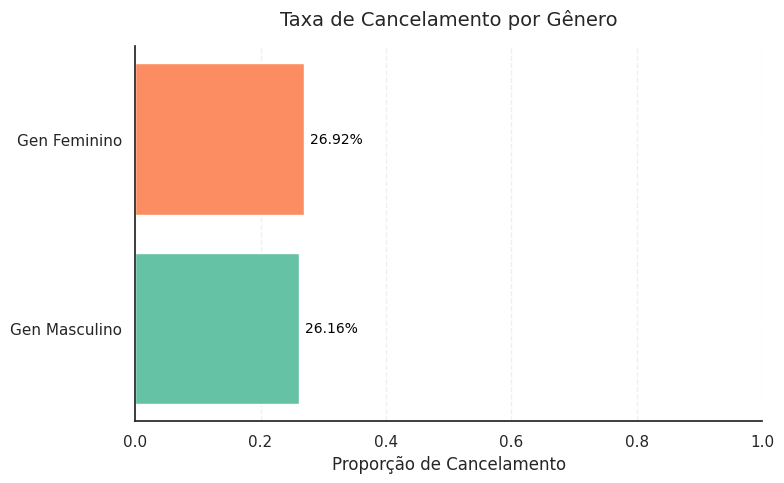

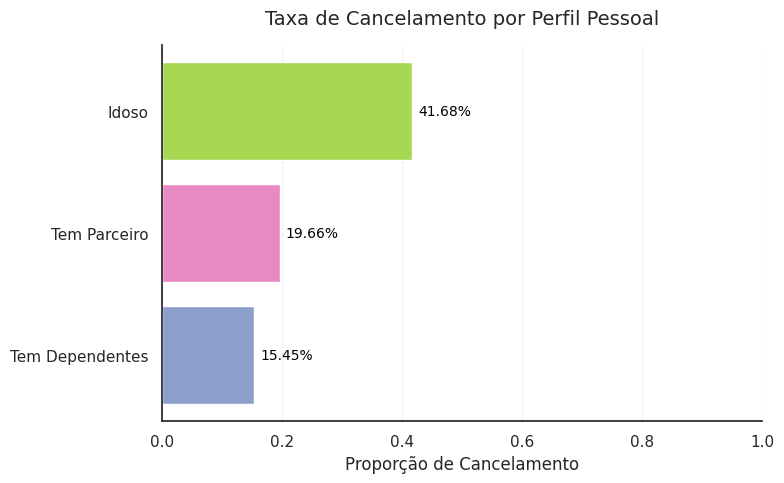

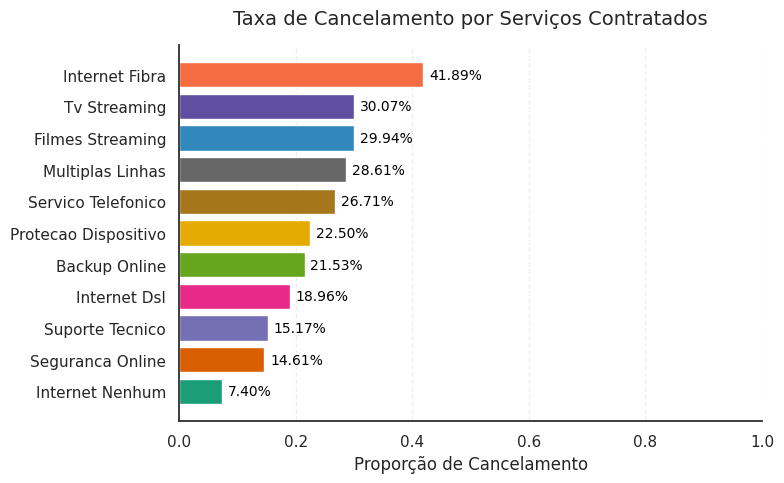

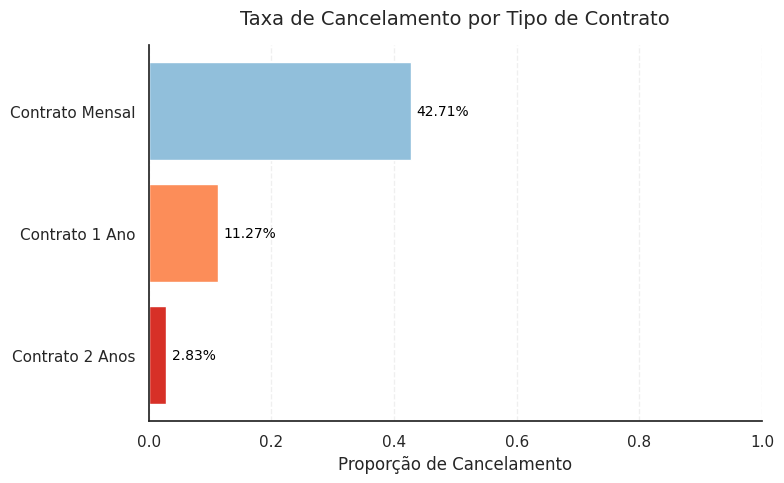

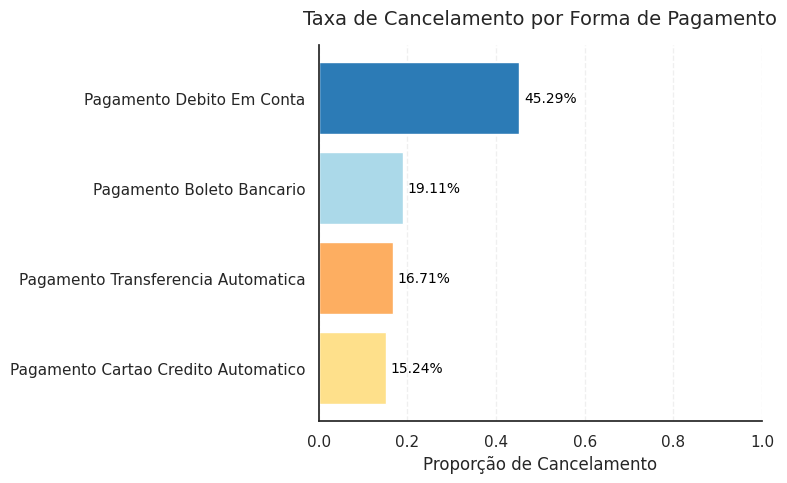

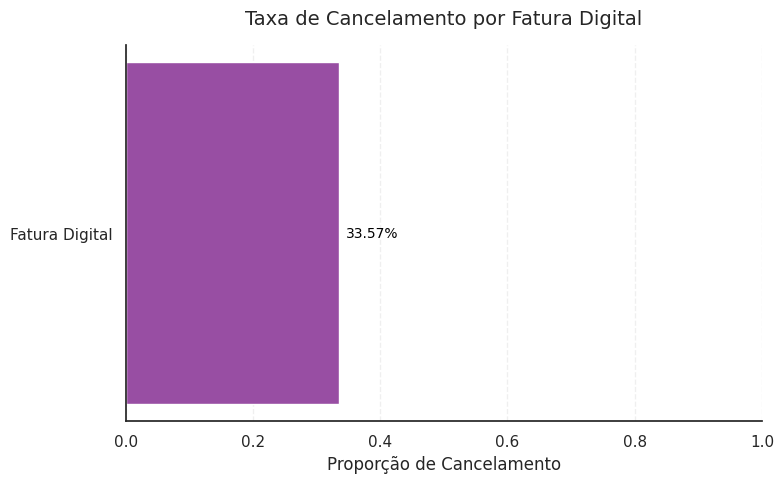

In [142]:
def grafico_cancelamento(df, colunas, titulo, cores):
    cancelamento = {
        col: df[df[col] == 1]['cancelamento'].mean()
        for col in colunas
    }
    serie = pd.Series(cancelamento).sort_values()

    fig, ax = plt.subplots(figsize=(8, 5))
    labels = serie.index.str.replace("_", " ").str.title()
    bars = ax.barh(labels, serie.values, color=cores[:len(serie)])

    ax.set_title(f'Taxa de Cancelamento por {titulo}', fontsize=14, pad=15)
    ax.set_xlabel('Proporção de Cancelamento', fontsize=12)
    ax.set_xlim(0, 1)

    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
                f'{width:.2%}', va='center', fontsize=10, color='black')

    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


grupos = {
    'Gênero': ['gen_feminino', 'gen_masculino'],
    'Perfil Pessoal': ['idoso', 'tem_parceiro', 'tem_dependentes'],
    'Serviços Contratados': [
        'servico_telefonico', 'multiplas_linhas', 'internet_dsl',
        'internet_fibra', 'internet_nenhum', 'seguranca_online',
        'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
        'tv_streaming', 'filmes_streaming'
    ],
    'Tipo de Contrato': ['contrato_mensal', 'contrato_1_ano', 'contrato_2_anos'],
    'Forma de Pagamento': [
        'pagamento_boleto_bancario', 'pagamento_cartao_credito_automatico',
        'pagamento_debito_em_conta', 'pagamento_transferencia_automatica'
    ],
    'Fatura Digital': ['fatura_digital']
}


paleta_cores = {
    'Gênero': ['#66c2a5', '#fc8d62'],
    'Perfil Pessoal': ['#8da0cb', '#e78ac3', '#a6d854'],
    'Serviços Contratados': ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e',
                             '#e6ab02', '#a6761d', '#666666', '#3288bd', '#5e4fa2', '#f46d43'],
    'Tipo de Contrato': ['#d73027', '#fc8d59', '#91bfdb'],
    'Forma de Pagamento': ['#fee08b', '#fdae61', '#abd9e9', '#2c7bb6'],
    'Fatura Digital': ['#984ea3']
}

for titulo, colunas in grupos.items():
    grafico_cancelamento(df, colunas, titulo, paleta_cores[titulo])


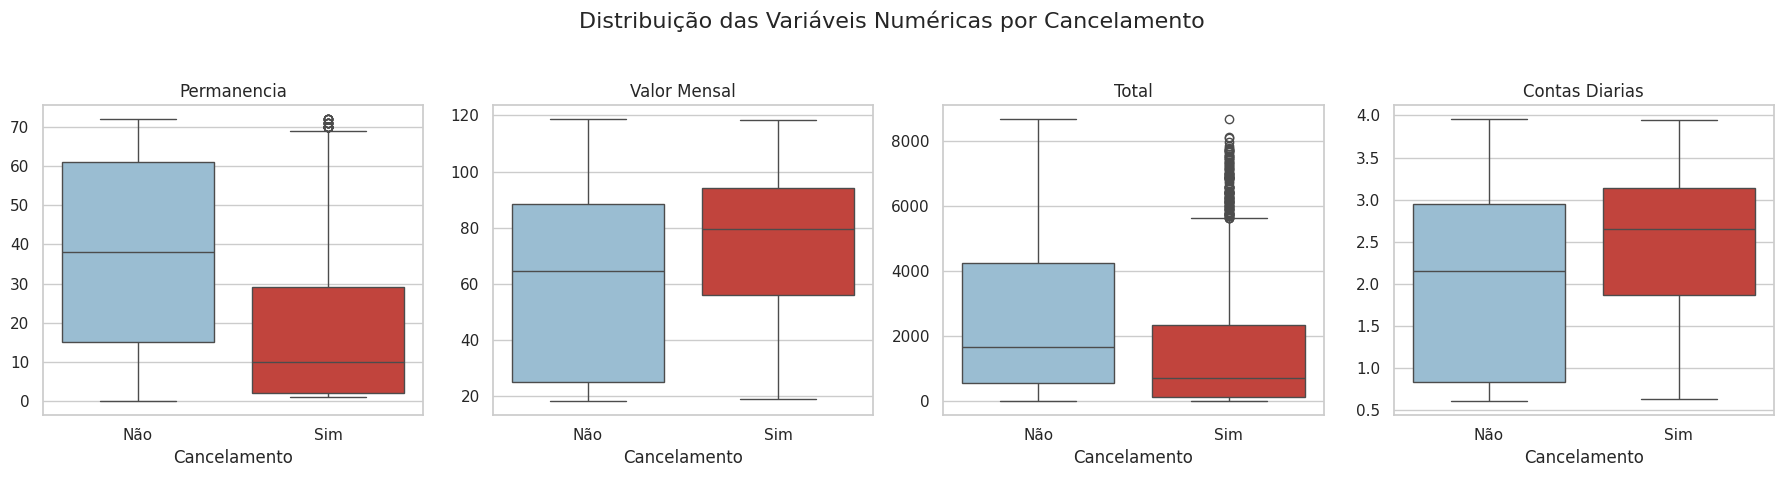

In [143]:
variaveis_numericas = ['permanencia', 'valor_mensal', 'total', 'contas_diarias']

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=len(variaveis_numericas), figsize=(18, 5), sharey=False)

df_plot = df.copy()
df_plot["cancelamento_str"] = df_plot["cancelamento"].map({0: "Não", 1: "Sim"})

cores = {"Não": "#91bfdb", "Sim": "#d73027"}

for i, var in enumerate(variaveis_numericas):
    sns.boxplot(
        data=df_plot,
        x='cancelamento_str',
        y=var,
        ax=axes[i],
        palette=cores,
        hue='cancelamento_str',
        legend=False
    )
    axes[i].set_title(var.replace("_", " ").title())
    axes[i].set_xlabel("Cancelamento")
    axes[i].set_ylabel("")


fig.suptitle('Distribuição das Variáveis Numéricas por Cancelamento', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


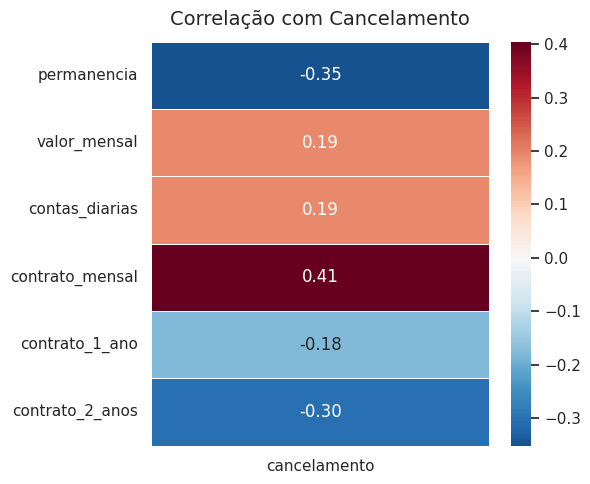

In [144]:

variaveis_corr = [
    'cancelamento', 'permanencia', 'valor_mensal',
    'contas_diarias',
    'contrato_mensal', 'contrato_1_ano', 'contrato_2_anos'
]
corr_matrix = df[variaveis_corr].corr()
corr_cancelamento = corr_matrix[['cancelamento']].drop('cancelamento')
plt.figure(figsize=(6, 5))
sns.heatmap(corr_cancelamento, annot=True, cmap='RdBu_r', center=0, fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Correlação com Cancelamento', fontsize=14, pad=12)
plt.tight_layout()
plt.show()


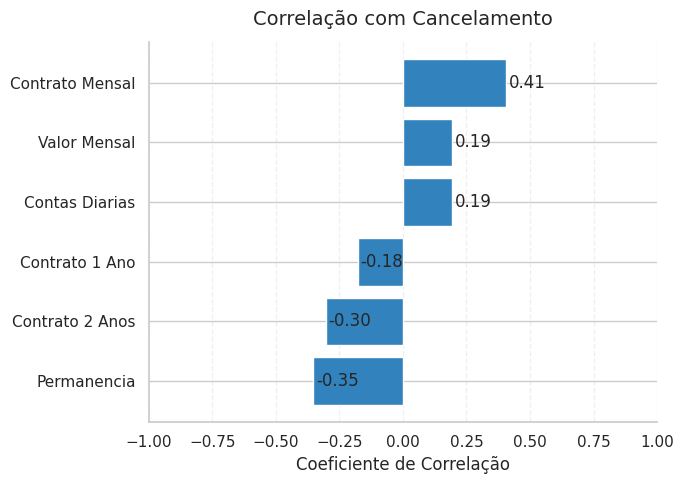

In [145]:
corr = df[variaveis_corr].corr()['cancelamento'].drop('cancelamento').sort_values()
plt.figure(figsize=(7, 5))
bars = plt.barh(corr.index.str.replace("_", " ").str.title(), corr.values, color='#3182bd')
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')
plt.title('Correlação com Cancelamento', fontsize=14, pad=12)
plt.xlabel('Coeficiente de Correlação', fontsize=12)
plt.xlim(-1, 1)
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

<ipython-input-146-3969701423>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cancelamento', y='quantidade_servicos', palette='pastel')


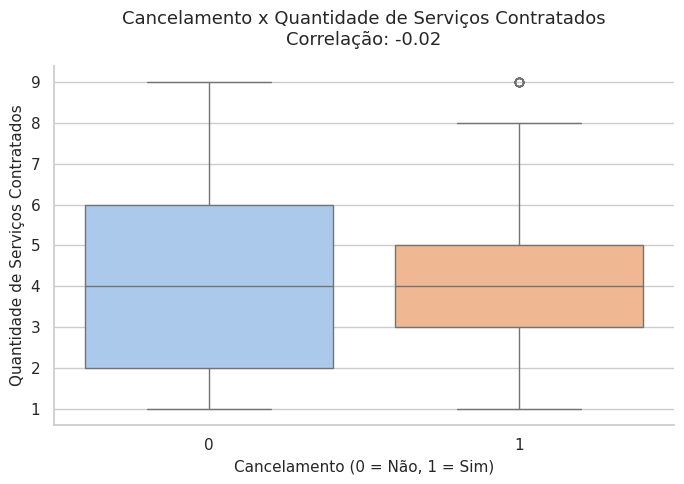

In [146]:
servicos = [
    'servico_telefonico', 'multiplas_linhas', 'internet_dsl',
    'internet_fibra', 'seguranca_online', 'backup_online',
    'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming', 'filmes_streaming'
]
df['quantidade_servicos'] = df[servicos].sum(axis=1)
correlacao = df[['quantidade_servicos', 'cancelamento']].corr().iloc[0, 1]
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='cancelamento', y='quantidade_servicos', palette='pastel')
plt.title(f'Cancelamento x Quantidade de Serviços Contratados\nCorrelação: {correlacao:.2f}', fontsize=13, pad=15)
plt.xlabel('Cancelamento (0 = Não, 1 = Sim)', fontsize=11)
plt.ylabel('Quantidade de Serviços Contratados', fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()

In [147]:
df.head()

,cliente_id,cancelamento,gen_feminino,gen_masculino,idoso,tem_parceiro,tem_dependentes,permanencia,servico_telefonico,multiplas_linhas,...,fatura_digital,pagamento_boleto_bancario,pagamento_cartao_credito_automatico,pagamento_debito_em_conta,pagamento_transferencia_automatica,valor_mensal,total,contas_diarias,total_previsto,quantidade_servicos
0,0002-ORFBO,0,1,0,0,1,1,9,1,0,...,1,1,0,0,0,65.6,593.30,2.186667,590.4,5
1,0003-MKNFE,0,0,1,0,0,0,9,1,1,...,0,1,0,0,0,59.9,542.40,1.996667,539.1,4
2,0004-TLHLJ,1,0,1,0,0,0,4,1,0,...,1,0,0,1,0,73.9,280.85,2.463333,295.6,3
3,0011-IGKFF,1,0,1,1,1,0,13,1,0,...,1,0,0,1,0,98.0,1237.85,3.266667,1274.0,6
4,0013-EXCHZ,1,1,0,1,1,0,3,1,0,...,1,1,0,0,0,83.9,267.40,2.796667,251.7,4


In [148]:
df.to_csv('dados_churn_final.csv', index=False)

#📄Relatorio Final

## 1. Introdução

A evasão de clientes (também conhecida como churn) é um problema recorrente para empresas prestadoras de serviços, impactando diretamente a receita e a sustentabilidade do negócio. Compreender os fatores que levam ao cancelamento de contratos é fundamental para que estratégias preventivas possam ser adotadas.

Esta análise tem como objetivo identificar os principais fatores relacionados à evasão de clientes, utilizando dados históricos de um serviço de telecomunicações. Ao longo deste relatório, serão descritos os processos de tratamento dos dados, as análises exploratórias realizadas com base nos dados tratados, os fatores mais relevantes para o cancelamento e, por fim, serão apresentadas recomendações práticas para mitigar o índice de evasão.

## 2. Sober os Dados

### 2.1 Descrição dos Dados

Os dados analisados foram fornecidos pela empresa TelecomX e consistem em um conjunto com 7.267 registros (linhas) e 21 variáveis (colunas) contendo informações detalhadas sobre clientes e seus comportamentos de consumo e cancelamento de serviços (churn).

As principais informações contidas no conjunto de dados são:

* Identificador único do cliente (customerID);

* Cancelamento do cliente (Churn);

* Gênero do cliente (gender);

* Se o cliente possui parceiro(a) (Partner);

* Se o cliente possui dependentes (Dependents);

* Se o cliente é idoso (SeniorCitizen);

* Serviços contratados, incluindo:

 * Serviço telefônico;

 * Múltiplas linhas;

 * Internet (DSL, fibra ou nenhum);

 * Segurança online;

 * Backup online;

 * Proteção de dispositivo;

 * Suporte técnico;

 * Streaming de TV;

 * Streaming de filmes;

* Tempo de permanência (em meses) (tenure);

* Tipo de contrato (mensal, anual de 1 ano ou anual de 2 anos) (Contract);

* Recebimento de fatura digital (PaperlessBilling);

* Forma de pagamento (PaymentMethod);

* Valor mensal pago pelo cliente (MonthlyCharges);

* Valor total acumulado de cobrança (TotalCharges).

Além dessas colunas originais, novas variáveis derivadas foram criadas durante o processo de tratamento para enriquecer a análise, como será detalhado em uma próxima seção.


### 2.2 Importação dos Dados

O primeiro passo da análise foi a importação dos dados. O conjunto estava disponível no formato JSON, contendo estruturas aninhadas, o que exigiu a aplicação de técnicas de normalização para convertê-lo em um formato tabular adequado.

Utilizando a biblioteca Pandas, os dados foram carregados e transformados em um DataFrame, separando corretamente as colunas internas aninhadas. Após essa etapa, foram realizadas análises iniciais com o objetivo de entender a estrutura do conjunto de dados, identificar o tipo de informação disponível em cada coluna e verificar possíveis inconsistências ou valores ausentes.

Essa etapa foi fundamental para garantir que os dados estivessem prontos para as fases seguintes de limpeza, transformação e análise exploratória.




### 2.3 Tratando Inconsistencias dos dados

Após as análises iniciais, foram identificadas algumas inconsistências nos dados que precisaram ser tratadas para garantir a integridade da análise.

A primeira inconsistência foi observada na coluna Churn, responsável por indicar se o cliente cancelou ou não o serviço. Algumas linhas apresentavam valores ausentes nessa coluna. Como essa informação é essencial para o estudo da evasão de clientes, optou-se por remover essas linhas do conjunto de dados.

Outra inconsistência foi encontrada na coluna Total, que representa o valor total já gasto pelo cliente. Para clientes novos, com tenure (permanência) igual a 0, o campo estava em branco. Considerando que esses clientes ainda não haviam gerado custos, as linhas com esse valor ausente foram preenchidas com zero, mantendo a coerência com os demais dados.

Essas correções foram fundamentais para garantir a qualidade dos dados antes das etapas de transformação e análise exploratória.

### 2.4 Padronização

Para padronizar e tornar o código mais legível, todos os nomes de colunas foram convertidos para o formato snake_case. Esse padrão facilita a escrita de consultas e a manutenção do notebook.

### 2.5 Conversão dos Dados

#### Conversão para Valores Numéricos

Após substituir os espaços em branco na coluna total pelos valores adequados (zero para clientes com tenure = 0), foi possível convertê‑la de object para float64, habilitando cálculos financeiros precisos.

#### Transformação de Respostas “Yes/No” em Binário

Colunas com respostas “Yes”, “No”, “No internet service” e “No phone service” foram padronizadas primeiro para “Yes/No” e, em seguida, convertidas para 0 = No e 1 = Yes.

#### One-hot Encoding

Variáveis categóricas com poucas categorias exclusivas (por exemplo, tipo de contrato ou forma de pagamento) receberam one‑hot encoding.

Cada categoria se tornou uma nova coluna binária (0 / 1).

Essa abordagem elimina ordens implícitas e prepara os dados para modelos de machine learning.

Motivação: Essas etapas ampliam a interpretabilidade e evitam vieses de ordem numérica em variáveis nominais.

### 2.6 Tradução para Português

Para tornar o relatório acessível a todos os stakeholders, nomes de colunas e valores categóricos foram traduzidos para o português (por exemplo, Churn → cancelamento, Fiber optic → fibra óptica).

### 2.7 Criação de Novas Colunas Derivadas

| Nova Coluna           | Fórmula / Regra                                 | Finalidade                                                                      |
| --------------------- | ----------------------------------------------- | ------------------------------------------------------------------------------- |
| `contas_diarias`      | `valor_mensal / 30`                             | Estimar gasto diário médio do cliente                                           |
| `tota_previsto`       | `valor_mensal × permanencia`                    | Simular o total esperado se o cliente mantiver o valor atual até o mês corrente |
| `quantidade_servicos` | Soma das variáveis de serviços binários (0 a 9) | Quantificar engajamento em termos de mix de serviços                            |


### Dicionário de Dados

| Coluna Original    | Coluna Nova                           | Descrição                                                     | Alterações nos Dados                                                                                                                                                                                                  |
| ------------------ | ------------------------------------- | ------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `customerID`       | `cliente_id`                          | Número de identificação único de cada cliente                 | Dados mantidos iguais                                                                                                                                                                                                 |
| `Churn`            | `cancelamento`                        | Se o cliente cancelou (0 = não, 1 = sim)                      | Removidos registros com valores vazios;<br>"Yes" → 1, "No" → 0                                                                                                                                                        |
| `gender`           | `genero`                              | Gênero em português (masculino, feminino)                     | Valores traduzidos                                                                                                                                                                                                    |
|                    | `gen_feminino`                        | Cliente do gênero feminino (1 = sim, 0 = não)                 | One-hot encoding da coluna `genero`                                                                                                                                                                                   |
|                    | `gen_masculino`                       | Cliente do gênero masculino (1 = sim, 0 = não)                | One-hot encoding da coluna `genero`                                                                                                                                                                                   |
| `SeniorCitizen`    | `idoso`                               | Cliente idoso (0 = não, 1 = sim)                              | Valores mantidos                                                                                                                                                                                                      |
| `Partner`          | `tem_parceiro`                        | Tem parceiro (0 = não, 1 = sim)                               | Convertido: "No" → 0, "Yes" → 1                                                                                                                                                                                       |
| `Dependents`       | `tem_dependentes`                     | Tem dependentes (0 = não, 1 = sim)                            | Convertido: "No" → 0, "Yes" → 1                                                                                                                                                                                       |
| `tenure`           | `permanencia`                         | Meses de contrato do cliente                                  | Mantido valor                                                                                                                                                                                                         |
| `PhoneService`     | `servico_telefonico`                  | Serviço telefônico ativo (0 = não, 1 = sim)                   | Convertido: "No" → 0, "Yes" → 1                                                                                                                                                                                       |
| `MultipleLines`    | `multiplas_linhas`                    | Múltiplas linhas ativas (0 = não, 1 = sim)                    | "No phone service" substituído por "No"; depois "No" → 0, "Yes" → 1                                                                                                                                                   |
| `InternetService`  | `tipo_internet`                       | Tipo de internet (fibra óptica, dsl, nenhum)                  | "No internet service" substituído por "No"; valores traduzidos                                                                                                                                                        |
|                    | `internet_dsl`                        | Cliente utiliza internet via DSL (1 = sim, 0 = não)           | One-hot encoding da coluna `tipo_internet`                                                                                                                                                                            |
|                    | `internet_fibra`                      | Cliente utiliza internet via fibra óptica (1 = sim, 0 = não)  | One-hot encoding da coluna `tipo_internet`                                                                                                                                                                            |
|                    | `internet_nenhum`                     | Cliente não possui internet (1 = sim, 0 = não)                | One-hot encoding da coluna `tipo_internet`                                                                                                                                                                            |
| `OnlineSecurity`   | `seguranca_online`                    | Segurança online ativa (0 = não, 1 = sim)                     | "No internet service" → "No"; depois "No" → 0, "Yes" → 1                                                                                                                                                              |
| `OnlineBackup`     | `backup_online`                       | Backup online ativo (0 = não, 1 = sim)                        | "No internet service" → "No"; depois "No" → 0, "Yes" → 1                                                                                                                                                              |
| `DeviceProtection` | `protecao_dispositivo`                | Proteção de dispositivo ativa (0 = não, 1 = sim)              | "No internet service" → "No"; depois "No" → 0, "Yes" → 1                                                                                                                                                              |
| `TechSupport`      | `suporte_tecnico`                     | Suporte técnico ativo (0 = não, 1 = sim)                      | "No internet service" → "No"; depois "No" → 0, "Yes" → 1                                                                                                                                                              |
| `StreamingTV`      | `tv_streaming`                        | Streaming de TV ativo (0 = não, 1 = sim)                      | "No internet service" → "No"; depois "No" → 0, "Yes" → 1                                                                                                                                                              |
| `StreamingMovies`  | `filmes_streaming`                    | Streaming de filmes ativo (0 = não, 1 = sim)                  | "No internet service" → "No"; depois "No" → 0, "Yes" → 1                                                                                                                                                              |
| `Contract`         | `tipo_contrato`                       | Tipo de contrato (mensal, anual 1 ano, anual 2 anos)          | Valores traduzidos                                                                                                                                                                                                    |
|                    | `contrato_mensal`                     | Tipo de contrato mensal (1 = sim, 0 = não)                    | One-hot encoding da coluna `tipo_contrato`                                                                                                                                                                            |
|                    | `contrato_1_ano`                      | Tipo de contrato anual (1 ano) (1 = sim, 0 = não)             | One-hot encoding da coluna `tipo_contrato`                                                                                                                                                                            |
|                    | `contrato_2_anos`                     | Tipo de contrato anual (2 anos) (1 = sim, 0 = não)            | One-hot encoding da coluna `tipo_contrato`                                                                                                                                                                            |
| `PaperlessBilling` | `fatura_digital`                      | Fatura digital (0 = não, 1 = sim)                             | Convertido: "No" → 0, "Yes" → 1                                                                                                                                                                                       |
| `PaymentMethod`    | `forma_pagamento`                     | Forma de pagamento do cliente                                 | Valores traduzidos:<br>- Electronic check → débito em conta<br>- Mailed check → boleto bancário<br>- Bank transfer (automatic) → transferência automática<br>- Credit card (automatic) → cartão de crédito automático |
|                    | `pagamento_debito_em_conta`           | Pagamento via débito em conta (1 = sim, 0 = não)              | One-hot encoding da coluna `forma_pagamento`                                                                                                                                                                          |
|                    | `pagamento_boleto_bancario`           | Pagamento por boleto bancário (1 = sim, 0 = não)              | One-hot encoding da coluna `forma_pagamento`                                                                                                                                                                          |
|                    | `pagamento_transferencia_automatica`  | Pagamento via transferência automática (1 = sim, 0 = não)     | One-hot encoding da coluna `forma_pagamento`                                                                                                                                                                          |
|                    | `pagamento_cartao_credito_automatico` | Pagamento via cartão de crédito automático (1 = sim, 0 = não) | One-hot encoding da coluna `forma_pagamento`                                                                                                                                                                          |
| `Charges.Monthly`  | `valor_mensal`                        | Valor mensal pago pelo cliente                                | Mantido valor original                                                                                                                                                                                                |
| `Charges.Total`    | `total`                               | Total gasto acumulado                                         | Convertido para valor numérico                                                                                                                                                                                        |
| *(nova)*           | `contas_diarias`                      | Valor diário estimado (valor mensal / 30)                     | Coluna calculada                                                                                                                                                                                                      |
| *(nova)*           | `total_previsto`                       | Total previsto (valor mensal × permanência)                   | Coluna calculada                                                                                                                                                                                                      |
| *(nova)*           | `quantidade_servicos`                 | Total de serviços contratados pelo cliente (0 a 9)            | Soma binária de serviços: telefone, múltiplas linhas, segurança, backup, proteção, suporte, TV, filmes                                                                                                                |

---

#### Notas

- Valores categóricos foram traduzidos para português.
- Valores "No phone service" e "No internet service" foram padronizados para "No".
- Registros com valores vazios no campo `Churn` foram removidos.
- As colunas categóricas `genero`, `tipo_internet`, `tipo_contrato` e `forma_pagamento` foram transformadas com one-hot encoding, criando colunas binárias renomeadas para facilitar análise.
- Colunas calculadas `contas_diarias` e `total_previsto` foram adicionadas para enriquecer os dados.

## 3. Análise Exploratória de Dados

### 3.1 Frequência de Cancelamento

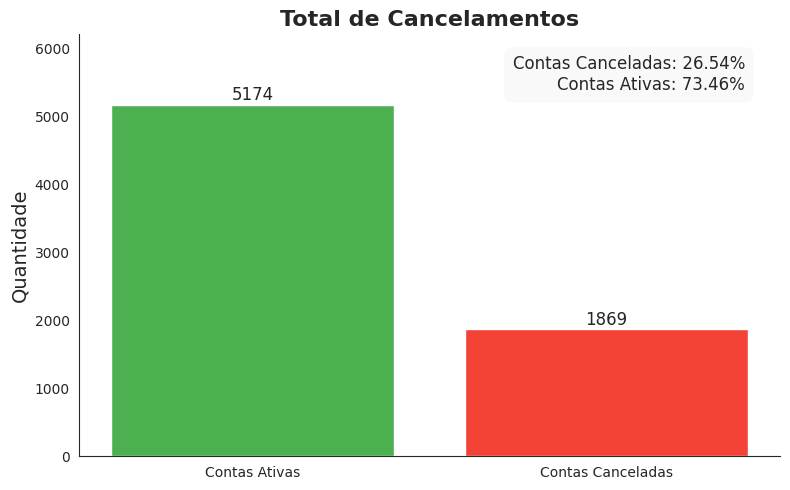

### 3.2 Correlação com Variáveis Numéricas

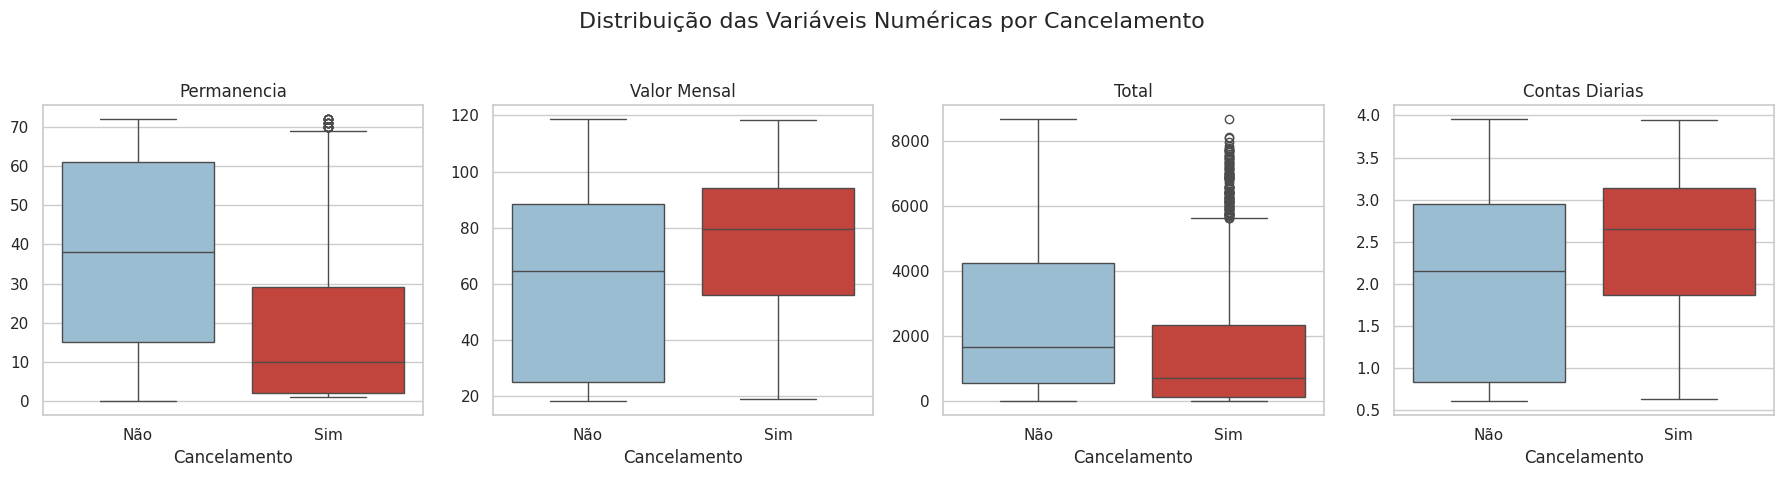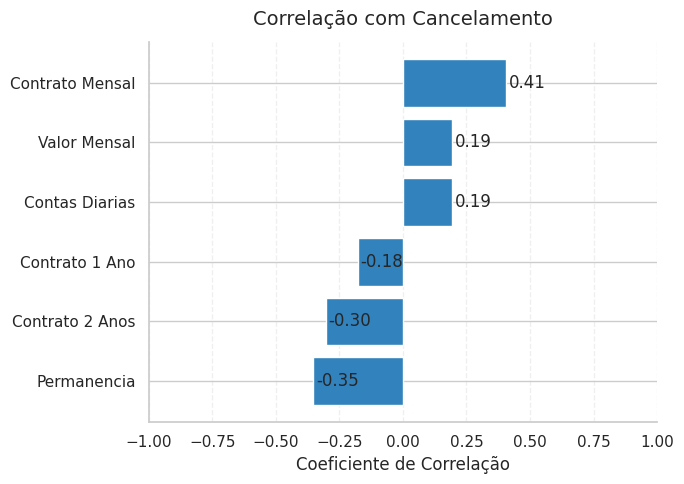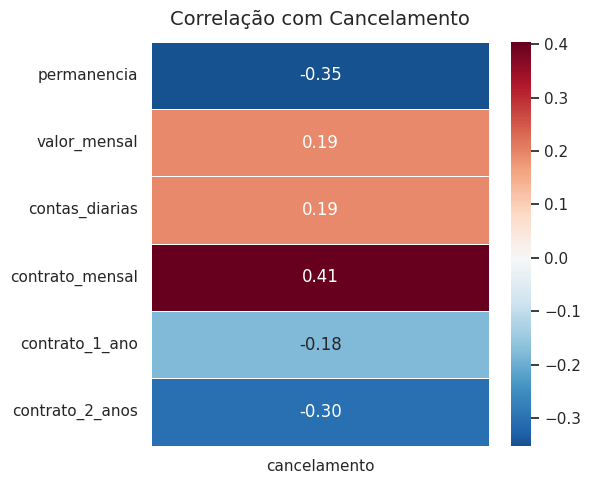

### 3.3 Análise por Tipo de Contrato

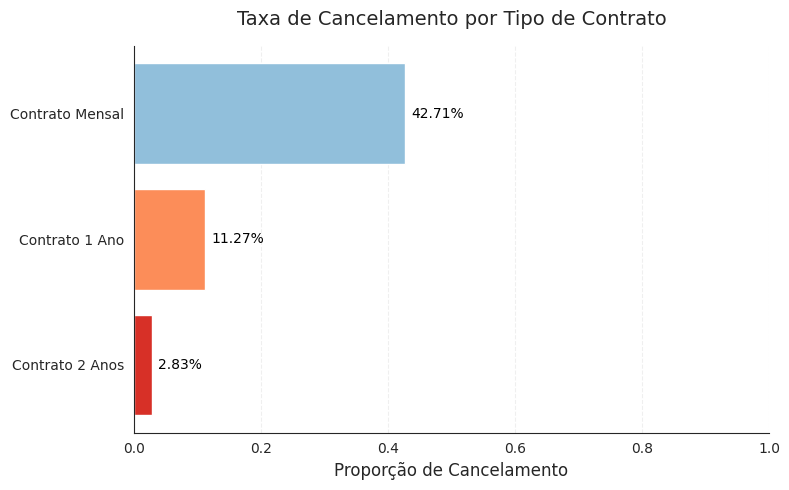

### 3.4 Análise de Serviços Contratados

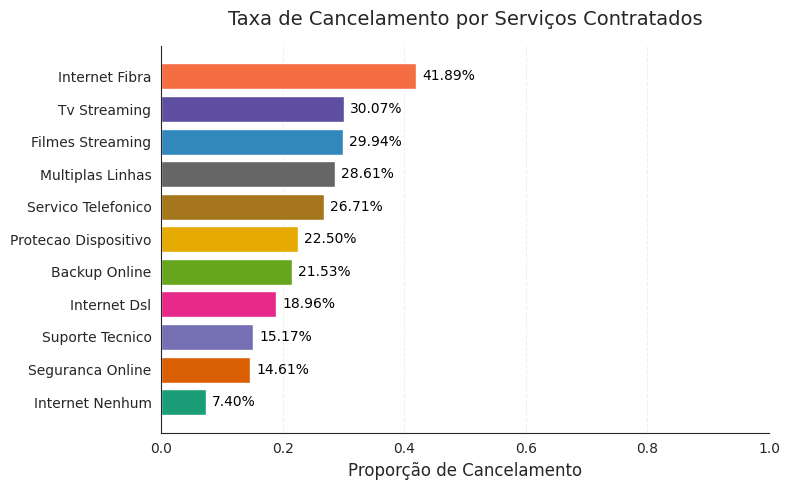

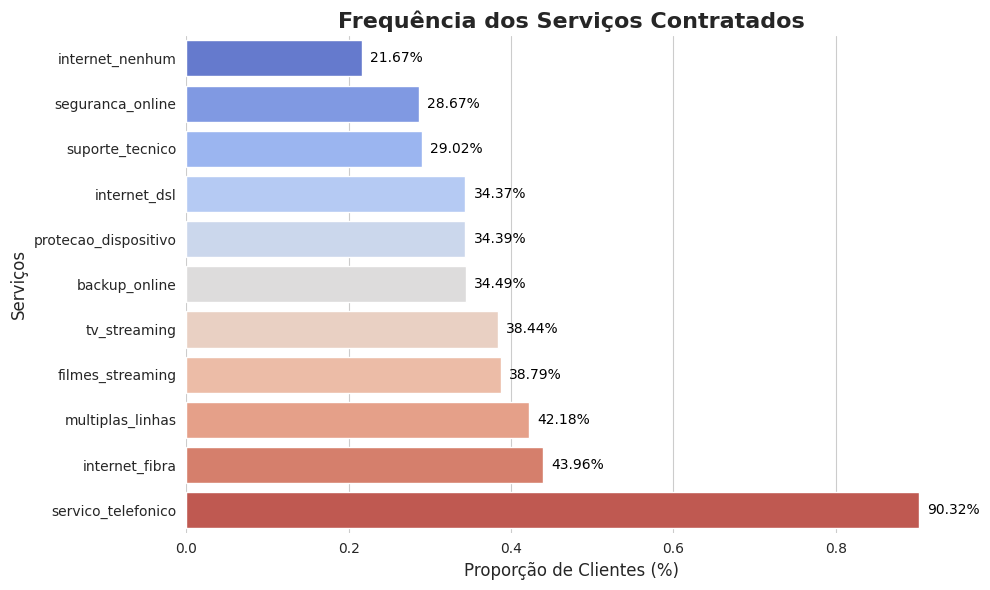

### 3.5 Cancelamento por Quantidade de Serviços

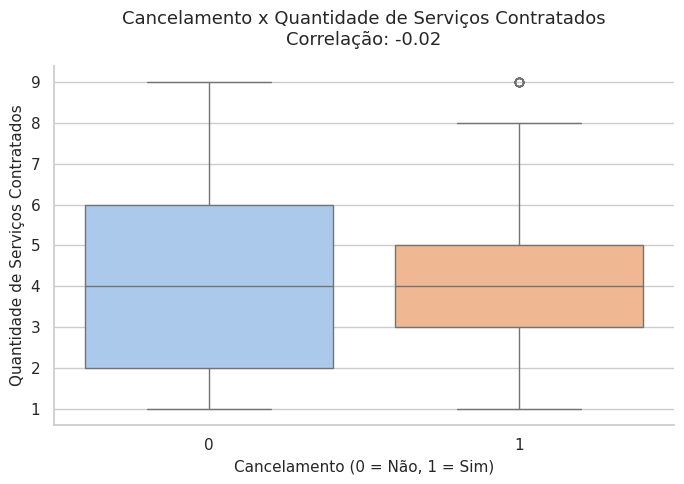

### 3.6 Cancelamento em Relação ao Perfil do Contratante

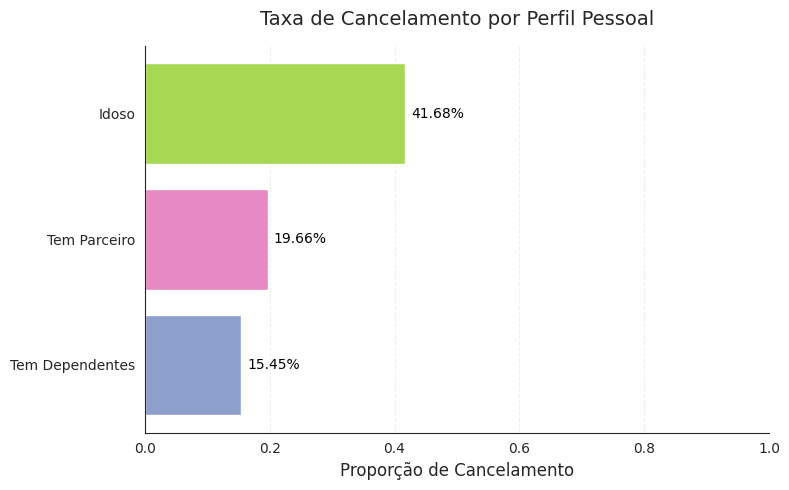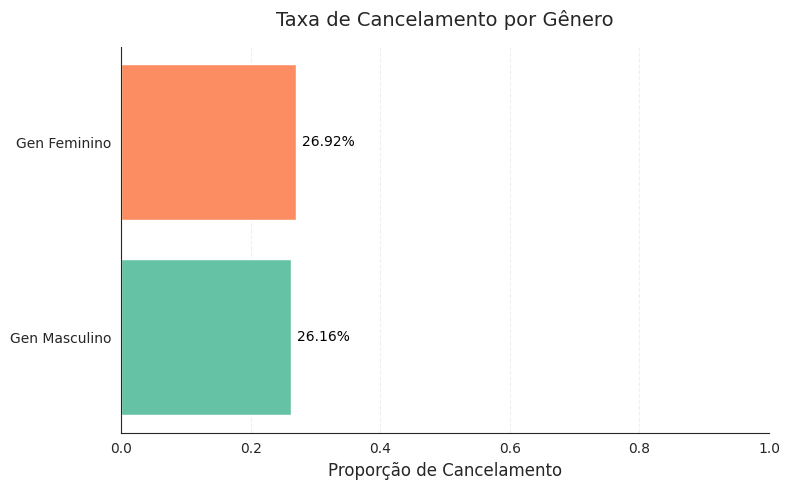

### 3.7 Cancelamento em Relação ao Tipo de Pagamento

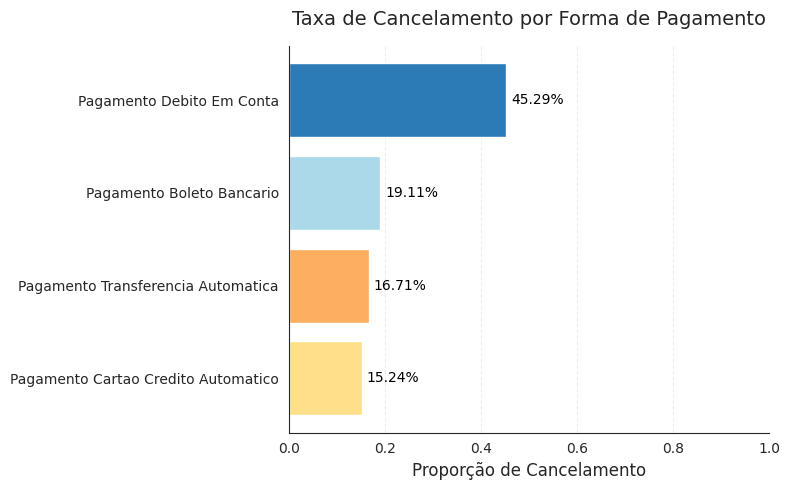

## 4. Conclusões e Insights

A análise exploratória dos dados revelou fatores relevantes que influenciam a evasão de clientes (churn). A seguir, os principais achados:

* Tipo de contrato: Clientes com contratos mensais apresentaram uma taxa de cancelamento significativamente maior em comparação com contratos anuais (1 ou 2 anos). Isso indica que contratos de curto prazo estão mais associados à evasão.

* Tempo de permanência: Clientes com menor tempo de permanência tendem a cancelar mais. Esse fator reforça a necessidade de ações rápidas nos primeiros meses de relacionamento com o cliente.

* Valor mensal da fatura: Há uma leve correlação positiva entre o valor mensal pago e a taxa de cancelamento, indicando que clientes com valores mais altos podem estar mais propensos a sair, talvez por percepção de custo-benefício.

* Tipo de internet: Usuários de internet via fibra óptica apresentaram maiores taxas de cancelamento em comparação com os que usam DSL ou não possuem internet, sugerindo uma possível insatisfação com esse serviço.

* Quantidade de serviços contratados: Embora clientes com mais serviços contratados demonstrem uma ligeira tendência de maior cancelamento, o efeito não é isoladamente determinante, o que indica que o mix de serviços não é um problema por si só.

* Idade dos clientes: Clientes idosos mostraram uma taxa de cancelamento mais elevada, sugerindo a necessidade de estratégias mais direcionadas a esse público.

* Forma de pagamento: A modalidade débito em conta apresentou a maior taxa de cancelamento, o que pode indicar uma insatisfação com esse meio ou com o fluxo de cobrança associado a ele.


Esses padrões identificados ao longo da análise são fundamentais para a formulação de estratégias de retenção, permitindo ações mais direcionadas conforme o perfil do cliente.

## 5. Recomendações

Com base nos principais achados da análise, seguem recomendações práticas que podem contribuir para a redução da taxa de evasão de clientes (Churn):

* Incentivar contratos de longo prazo: Oferecer benefícios exclusivos para clientes que optarem por contratos de 1 ou 2 anos, como descontos progressivos, acesso a canais premium ou prioridade no suporte técnico.

* Atuação no início do ciclo de vida do cliente: Monitorar clientes nos primeiros meses de relacionamento e reforçar o suporte pós-venda, com foco em entender e resolver rapidamente possíveis frustrações iniciais.

* Revisar a política de preços: Avaliar competitividade dos valores mensais, especialmente para planos com vários serviços agregados. É essencial garantir que os pacotes sejam percebidos como vantajosos em comparação aos concorrentes.

* Aprimorar o serviço de fibra óptica: Investir em infraestrutura, estabilidade e suporte técnico para clientes que utilizam fibra óptica, visto que essa categoria apresentou maior índice de cancelamento.

* Atendimento direcionado ao público idoso: Criar canais de atendimento mais simples e humanizados, evitando o uso exclusivo de chatbots. Considerar consultores especializados ou canais prioritários para esse grupo.

* Incentivar pagamento via débito em conta com vantagens: Apesar da maior taxa de cancelamento, o débito automático representa menos custos operacionais para a empresa. Oferecer descontos ou vantagens exclusivas pode incentivar o uso e melhorar a retenção nesse segmento.

* Criar programas de fidelização: Desenvolver ações que recompensem a permanência, como programas de pontos, brindes a cada 12 meses de contrato ou upgrades automáticos após determinado tempo de fidelidade.





## 6. Conclusão

O estudo trouxe uma visão clara sobre os fatores que mais influenciam na evasão de clientes. Com essas informações, é possível estruturar ações de retenção mais eficazes, reduzindo custos e aumentando a permanência dos clientes.

Próximos passos sugeridos:

* Implementar um modelo preditivo de churn.

* Testar intervenções com grupos de clientes em risco.

* Acompanhar os efeitos das recomendações ao longo do tempo.